In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
import numpy as np

In [2]:
final_df=pd.read_csv("../data_files/final_youtube_fix.csv")
print(final_df.columns)

Index(['Unnamed: 0', 'Released', 'Title', 'Source', 'Production Budget',
       'Opening Weekend Revenue', 'Domestic Box Office',
       'Infl. Adj. Dom. Box Office', 'International Box Office',
       'Worldwide Box Office', 'ratings', 'awards', 'rated', 'runtime',
       'genere', 'metascore', 'imdbRating', 'imdbVotes', 'imdbID',
       'nominations', 'trailer ids', 'max viewcount',
       'Infl. Adj. Production Budget', 'Infl. Adj. International Box Office',
       'Infl. Adj. Worldwide Box Office', 'Infl. Adj. Opening Weekend Revenue',
       'Genre', 'release_year', 'release_month'],
      dtype='object')


# Nominations vs Worldwide Box Office

In [3]:
final_df=final_df[final_df['nominations']>0]

In [4]:
nomination_bins = [-1,5,10,50,1000]
nomination_labels = ["<5","5-10","10-50",">50"]

final_df["nominations_group"]=pd.cut(final_df["nominations"],nomination_bins,labels=nomination_labels)

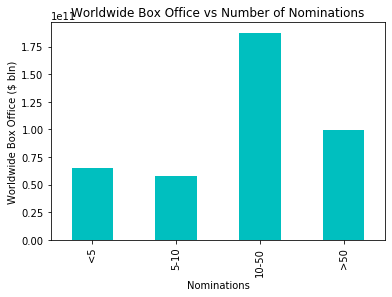

In [26]:
plot_df=final_df.loc[:,['Infl. Adj. Worldwide Box Office','nominations_group']]
plot_df=plot_df.groupby(["nominations_group"]).sum()

plot_df.plot(kind="bar",color="c",label="Worldwide Box Office ($ bln)",legend=False,
            title="Worldwide Box Office vs Number of Nominations")
plt.xlabel("Nominations")
plt.ylabel("Worldwide Box Office ($ bln)")

plt.savefig("../plot_pics/nominations_boxoffice_bar.png")

Correlation coefficient: 

                                  Infl. Adj. Worldwide Box Office  nominations
Infl. Adj. Worldwide Box Office                         1.000000     0.302966
nominations                                             0.302966     1.000000


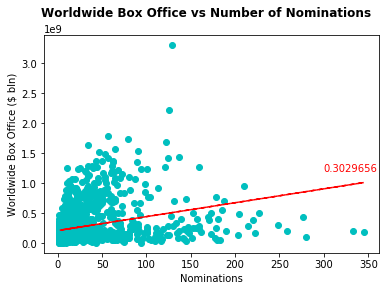

In [13]:
scatter_plot_df=final_df.loc[:,['Infl. Adj. Worldwide Box Office','nominations']]
x_axis=scatter_plot_df['nominations']
corr = scatter_plot_df['Infl. Adj. Worldwide Box Office']

(slope, intercept, r_value, p_value, std_err) = linregress(x_axis, corr)
fit = slope * x_axis + intercept

fig, ax = plt.subplots()
fig.suptitle("Worldwide Box Office vs Number of Nominations", fontsize=12, fontweight="bold")

# ax.set_xlim(-1, 25)
# ax.set_ylim(30, 50)
ax.set_xlabel("Nominations")
ax.set_ylabel("Worldwide Box Office ($ bln)")
ax.plot(x_axis, corr, linewidth=0, marker='o',color='c')
ax.plot(x_axis, fit, 'b--',color="r")
plt.annotate("0.3029656",(300,1200000000),fontsize=10,color="r")

print("Correlation coefficient: \n\n",scatter_plot_df.corr(method ='pearson'))

plt.savefig("../plot_pics/nominations_scatter.png")

# Nominations vs Production Budget

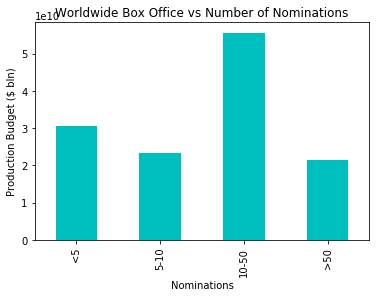

In [11]:
prod_df=final_df.loc[:,['Infl. Adj. Production Budget','nominations_group']]
prod_df=prod_df.groupby(["nominations_group"]).sum()

prod_df.plot(kind="bar",color="c",label="Production Budget ($ bln)",legend=False,
            title="Worldwide Box Office vs Number of Nominations")
plt.xlabel("Nominations")
plt.ylabel("Production Budget ($ bln)")

plt.savefig("../plot_pics/nominations_prod_bar.png")

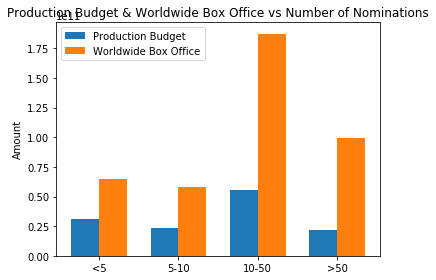

In [29]:
bars_df=final_df.loc[:,['Infl. Adj. Production Budget','Infl. Adj. Worldwide Box Office','nominations_group']]
bars_df=bars_df.groupby(["nominations_group"],as_index=False).sum()

nominations = bars_df['nominations_group']
production = bars_df['Infl. Adj. Production Budget']
box_office = bars_df['Infl. Adj. Worldwide Box Office']

x = np.arange(len(nominations))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, production, width, label='Production Budget')
rects2 = ax.bar(x + width/2, box_office, width, label='Worldwide Box Office')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Amount')
ax.set_title('Production Budget & Worldwide Box Office vs Number of Nominations')
ax.set_xticks(x)
ax.set_xticklabels(nominations)
ax.legend()

fig.tight_layout()

plt.savefig("../plot_pics/nominations_COMBINED_bar.png")